In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.rcParams['figure.dpi'] = 125

In [ ]:
df = pd.read_csv("2018.csv")

In [ ]:
print(f'Shape of the data {df.shape}')
print("--------------------------------------------------------------------------------------//")
print(df.describe)
print("--------------------------------------------------------------------------------------//")
print(df.info())
print("--------------------------------------------------------------------------------------//")
df.head()

Shape of the data (6667, 14)
--------------------------------------------------------------------------------------//
<bound method NDFrame.describe of          NO    TANGGAL  ... cPhase                         Region
0        1.0  1/1/2018  ...     14    South of Sumbawa, Indonesia
1        2.0  1/1/2018  ...     39  Minahassa Peninsula, Sulawesi
2        3.0  1/1/2018  ...      5            Sulawesi, Indonesia
3        4.0  1/1/2018  ...      6      Sumbawa Region, Indonesia
4        5.0  1/1/2018  ...      5  Minahassa Peninsula, Sulawesi
...      ...       ...  ...    ...                            ...
6662  1289.0  8/3/2018  ...      7      Sumbawa Region, Indonesia
6663  1289.0  8/3/2018  ...      7      Sumbawa Region, Indonesia
6664  1289.0  8/3/2018  ...      5        Sumba Region, Indonesia
6665  1289.0  8/3/2018  ...     10      Sumbawa Region, Indonesia
6666  1289.0  8/3/2018  ...      7      Sumbawa Region, Indonesia

[6667 rows x 14 columns]>
-----------------------------

,NO,TANGGAL,WAKTU,LINTANG,BUJUR,KEDA,Mag,TypeMag,smaj,smin,az,rms,cPhase,Region
0,1.0,1/1/2018,00:43:05 UTC,11.65 LS,117.61 BT,10 Km,4.2 SR,MLv,7.912,2.807,233,0.581,14,"South of Sumbawa, Indonesia"
1,2.0,1/1/2018,00:52:32 UTC,0.33 LS,123.73 BT,112 Km,5.1 SR,MLv,10.316,0.932,54,0.904,39,"Minahassa Peninsula, Sulawesi"
2,3.0,1/1/2018,02:47:53 UTC,1.4 LS,120.47 BT,10 Km,2.4 SR,MLv,3.220,1.196,137,0.682,5,"Sulawesi, Indonesia"
3,4.0,1/1/2018,03:03:26 UTC,9.42 LS,117.9 BT,24 Km,2.4 SR,MLv,1.206,0.596,279,0.122,6,"Sumbawa Region, Indonesia"
4,5.0,1/1/2018,03:07:09 UTC,1.42 LU,122.04 BT,17 Km,1.9 SR,MLv,1.299,0.533,232,0.027,5,"Minahassa Peninsula, Sulawesi"


In [ ]:
df["Region"].value_counts()

Sumbawa Region, Indonesia         835
Minahassa Peninsula, Sulawesi     736
Java, Indonesia                   608
Banda Sea                         323
Southern Sumatra, Indonesia       313
                                 ... 
Southern Xinjiang, China            1
Turkmenistan                        1
Nepal-India Border Region           1
India-Bangladesh Border Region      1
Tunisia                             1
Name: Region, Length: 206, dtype: int64

In [ ]:
df_sumbawa = df[df["Region"] == "Sumbawa Region, Indonesia"]

In [ ]:
df_sumbawa_obj = df_sumbawa.iloc[:,[3,4,6]]
df_sumbawa_obj.head()

,LINTANG,BUJUR,Mag
3,9.42 LS,117.9 BT,2.4 SR
18,9.48 LS,118.11 BT,3.1 SR
45,8.74 LS,118.35 BT,2.9 SR
46,8.68 LS,118.36 BT,3.3 SR
64,9.96 LS,116.59 BT,3.6 SR


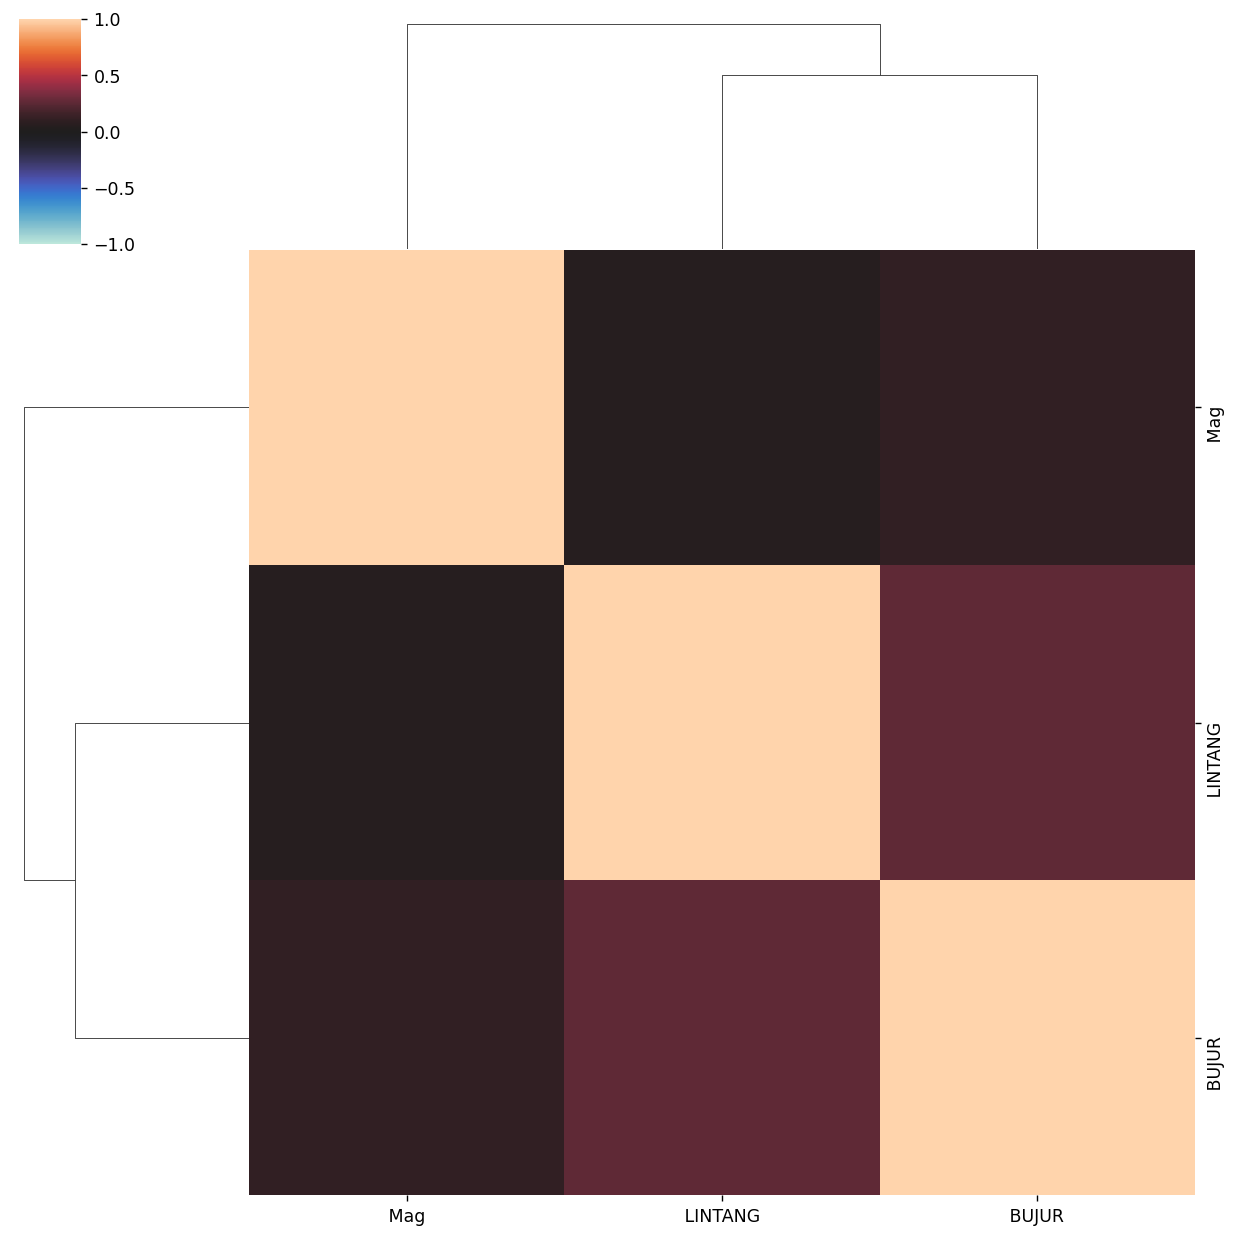

In [ ]:
for colname in df_sumbawa_obj.select_dtypes(["object", "category"]):
    df_sumbawa_obj[colname], _ = df_sumbawa_obj[colname].factorize()
    
df_sumbawa_obj.head()

sns.clustermap(
    df_sumbawa_obj.corr("pearson"),
    vmin=-1.0,
    vmax=1.0,
    cmap="icefire",
    method="complete",
)

In [ ]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(df_sumbawa_obj)
print(np.unique(Y))

[0 1 2 3 4]


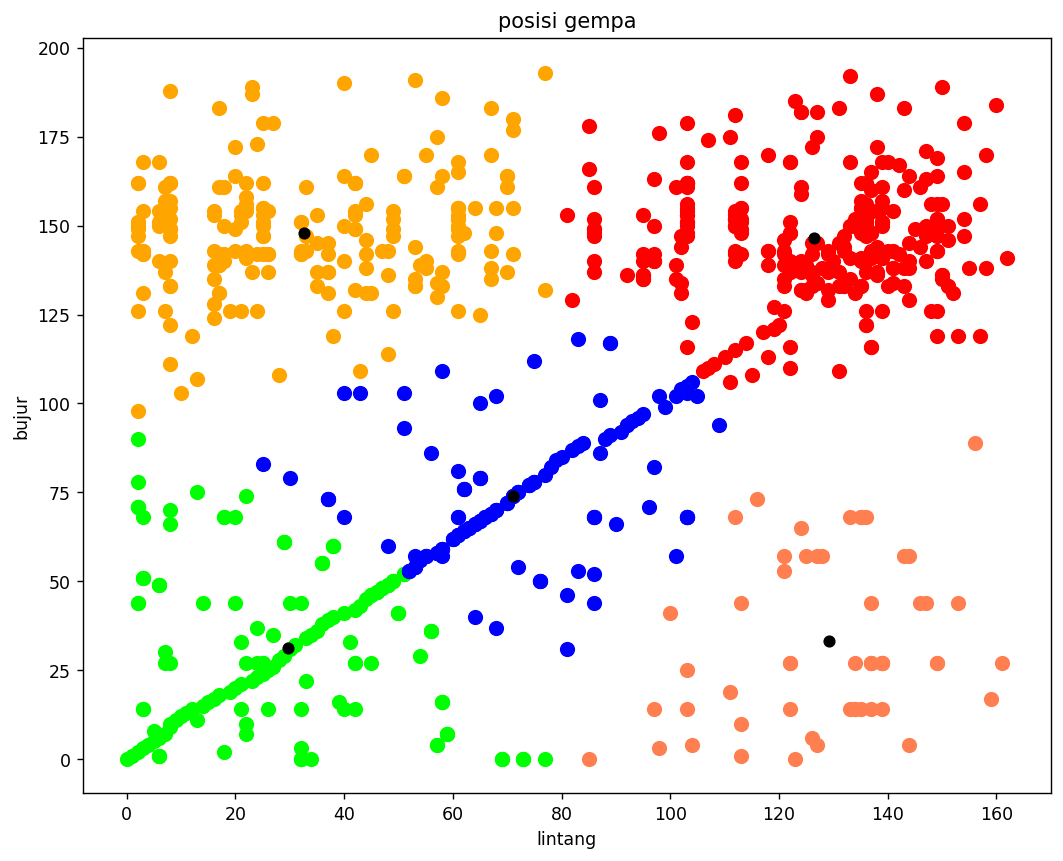

In [ ]:
cluster = df_sumbawa_obj.iloc[:,[0,1]].values

plt.figure(figsize=(10,8))
plt.scatter(cluster[Y==0,0], cluster[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(cluster[Y==1,0], cluster[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(cluster[Y==2,0], cluster[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(cluster[Y==3,0], cluster[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(cluster[Y==4,0], cluster[Y==4,1], s=60, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.title('posisi gempa')
plt.xlabel('lintang')
plt.ylabel('bujur')
plt.show()